## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Image Size: (3024, 4032, 3)


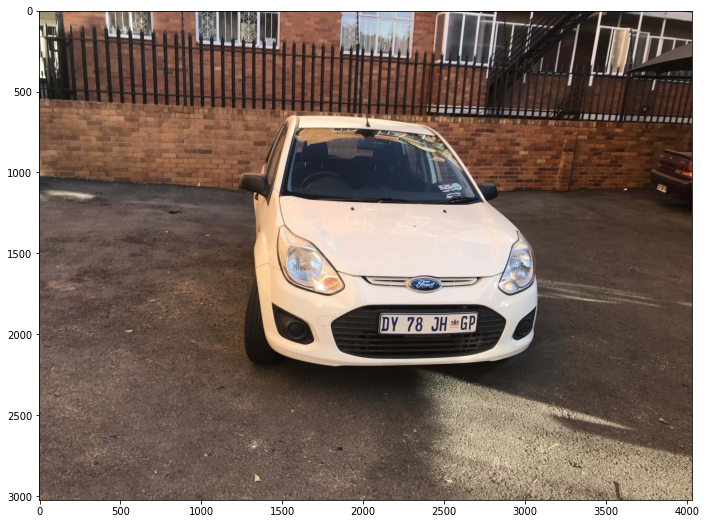

In [2]:
img = cv2.imread('view3.jpeg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image Size:", rgb_img.shape)

plt.figure(figsize=(16, 9))
plt.imshow(rgb_img)

The original image has a width of 4032 and height of 3024 pixels. Processing images of this size usually is time consuming. We will try to experiment on this further going on.

## Background Removal with GrabCut

In [3]:
## Code for background removal

def background_removal(img, x, y, w, h):
    start = time.time()
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (x, y, w, h)

    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    seg_img = img*mask2[:,:,np.newaxis]
    print("Time taken for background separation:", time.time()-start)
    
    return seg_img

Lets work with our first image 

In [5]:
img = cv2.imread('view3.jpeg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

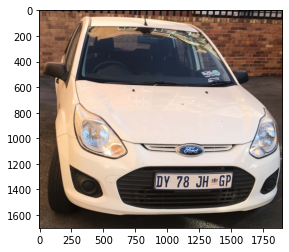

In [6]:
plt.imshow(rgb_img[600:2300,1200:3100])

In [7]:
## coordinates of a rectangle which includes the foreground object (car)

x = 1200
y = 600
w = 1900                        ## 3100 - 1200
h = 1700                        ## 2300 - 600

Time taken for background separation: 95.72799706459045


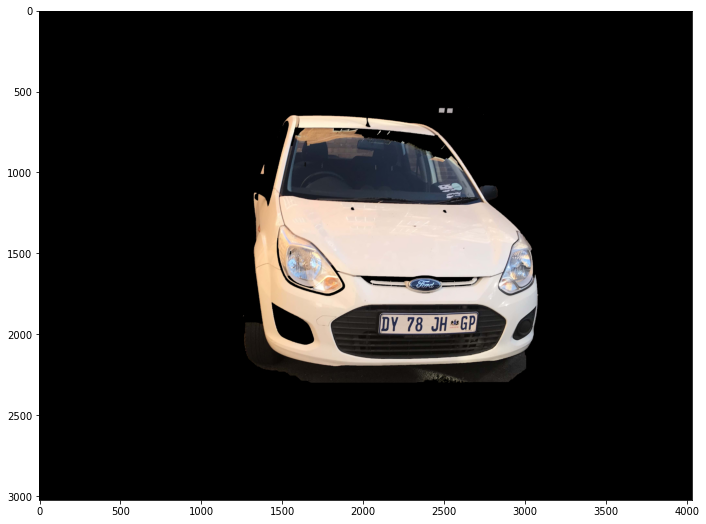

In [8]:
result1 = background_removal(rgb_img, x, y, w, h)

plt.figure(figsize=(16, 9))
plt.imshow(result1)

It took a minute and a half for the task which is not ideal. Lets try downsampling the image.

In [9]:
img = cv2.imread('view3.jpeg')

# Downsampling to half
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image Size:", rgb_img.shape)

Image Size: (1512, 2016, 3)


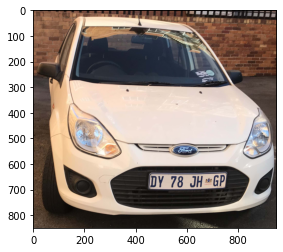

In [10]:
## Foreground object (car) region
 
plt.imshow(rgb_img[300:1150,600:1550])

In [11]:
x = 600
y = 300
w = 950                               ## 1550 - 600
h = 850                               ## 1150 - 300

Time taken for background separation: 13.556994915008545


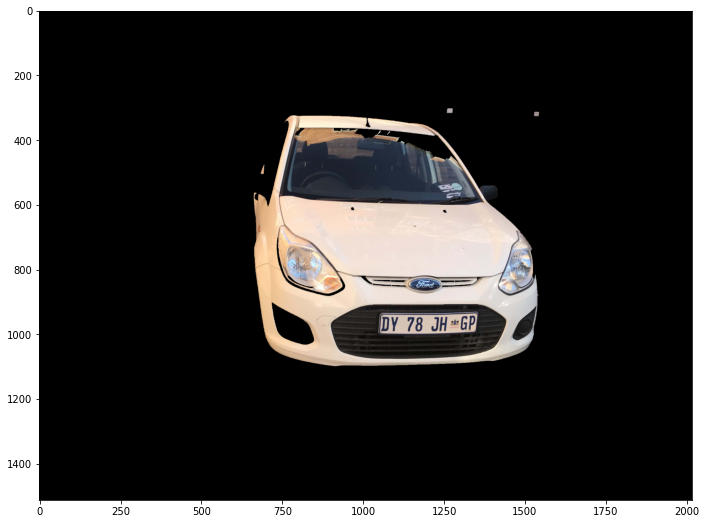

In [12]:
result2 = background_removal(rgb_img, x, y, w, h)

plt.figure(figsize=(16,9))
plt.imshow(result2)

This time it took almost 14 seconds for the task but still it is not ideal. We can do better. Lets downsample the image one last time.

In [13]:
img = cv2.imread('view3.jpeg')

# Downsampling to one fourth
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image Size:", rgb_img.shape)

Image Size: (756, 1008, 3)


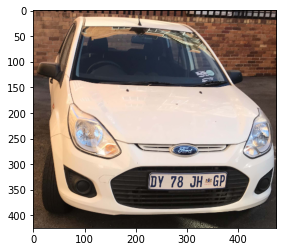

In [14]:
## Foreground object (car) region
 
plt.imshow(rgb_img[150:575,300:775])

In [15]:
x = 300
y = 150
w = 475                              ## 775 - 300
h = 425                              ## 575 - 150

Time taken for background separation: 2.8519976139068604


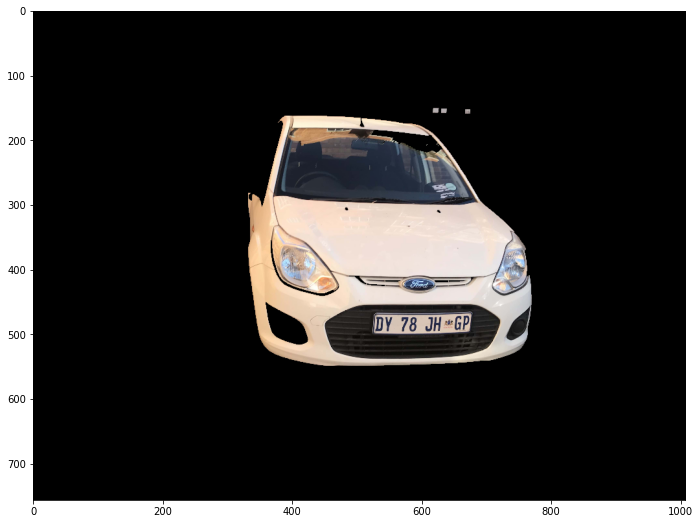

In [16]:
result3 = background_removal(rgb_img, x, y, w, h)

plt.figure(figsize=(16,9))
plt.imshow(result3)

In [23]:
## plt.imsave('img_rem3.jpg', result3)

This result looks promising. Although we can downsample further for better results, it might compromise the image quality.

Lets try this out for the rest of the images

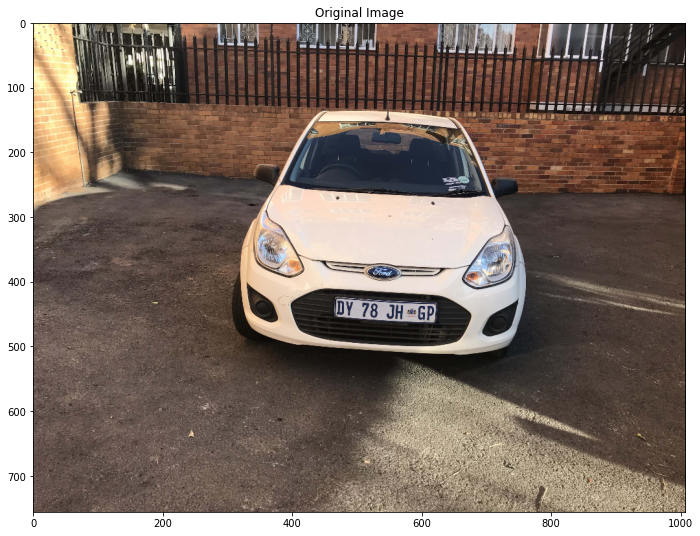

In [18]:
img = cv2.imread('view1.jpeg')

# Downsampling to one fourth
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,9))
plt.title('Original Image')
plt.imshow(rgb_img)

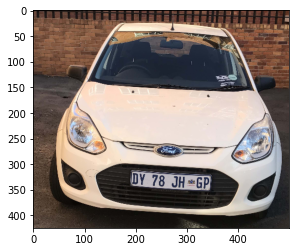

In [20]:
plt.imshow(rgb_img[112:537, 275:775])

In [21]:
x = 275
y = 112
w = 500                            ##  775 - 275
h = 425                            ##  537 - 112

Time taken for background separation: 3.226994276046753


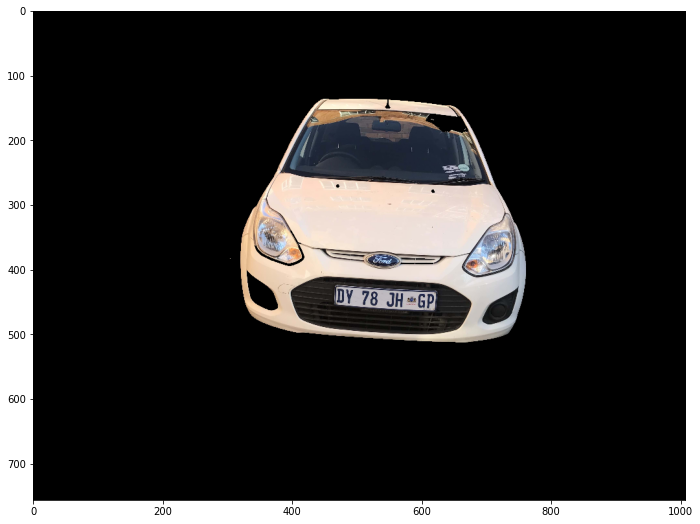

In [22]:
result4 = background_removal(rgb_img, x, y, w, h)

plt.figure(figsize=(16,9))
plt.imshow(result4)

In [24]:
## plt.imsave('img_rem1.jpg', result4)

Next Image

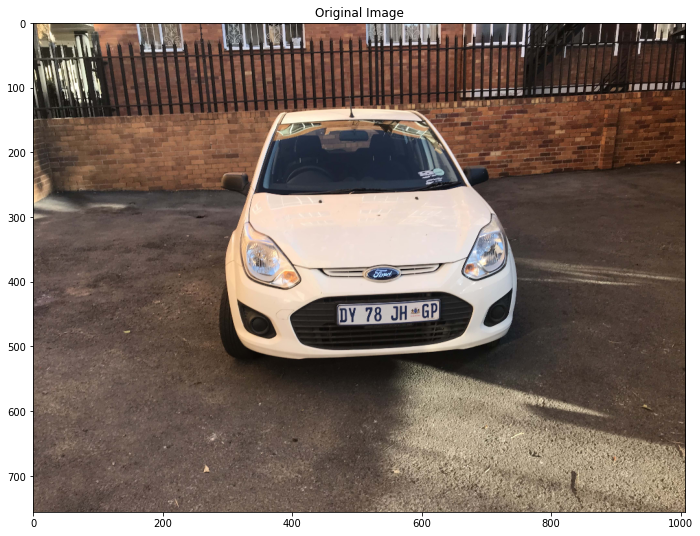

In [25]:
img = cv2.imread('view2.jpeg')

# Downsampling to one fourth
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,9))
plt.title('Original Image')
plt.imshow(rgb_img)

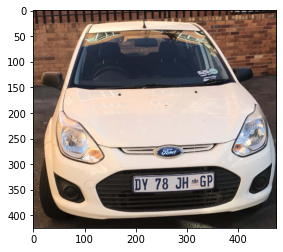

In [26]:
plt.imshow(rgb_img[112:537,275:750])

In [27]:
x = 275
y = 112
w = 475                               ## 750 - 275
h = 425                               ## 537 - 112

Time taken for background separation: 2.817986488342285


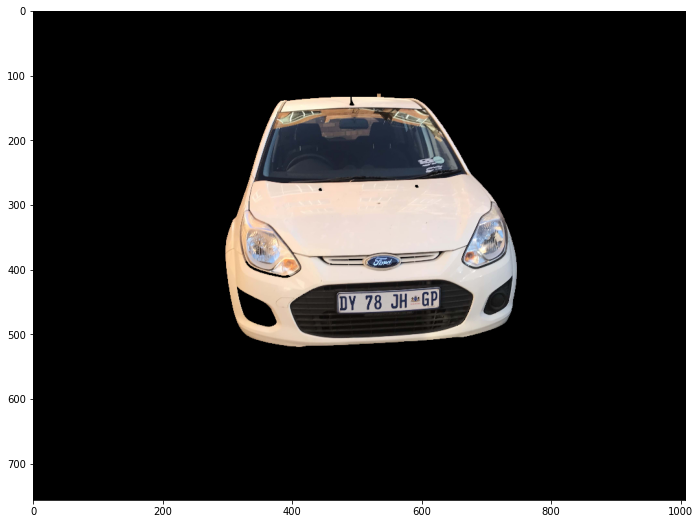

In [28]:
result5 = background_removal(rgb_img, x, y, w, h)

plt.figure(figsize=(16,9))
plt.imshow(result5)

In [29]:
## plt.imsave('img_rem2.jpg', result5)

I dont have much knowledge about background replacement but I am willing to and curious to know how is it going to benefit your work 

:D